# Waterfilling Levels

In [1]:
import sys
sys.path.insert(1, '../../functions')
import importlib
import numpy as np
import nbformat
import plotly.express
import plotly.express as px
import pandas as pd
import scipy.optimize as optimization
import food_bank_functions
import food_bank_bayesian
import matplotlib.pyplot as plt
import seaborn as sns
from food_bank_functions import *
from food_bank_bayesian import *
importlib.reload(food_bank_functions)

<module 'food_bank_functions' from '../../functions/food_bank_functions.py'>

In [2]:
np.random.seed(1)

### Generating Distribution

In [3]:
lam = 10
num_bins = 26
samples = np.random.poisson(lam,100000)

In [4]:
print(samples)
min_samples = np.floor(min(samples))
max_samples = np.ceil(max(samples))
print(min_samples, max_samples)

[ 9  6  7 ... 11 10 11]
0.0 26.0


In [5]:
bins = np.digitize(samples, np.arange(min_samples+1, max_samples+1))
support = np.arange(min_samples+1, max_samples+1)
support = np.append(support, max(samples))
print(support)
vals = np.zeros(len(support))

for i in bins:
    vals[i] += 1
vals = vals / np.sum(vals)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 26.]


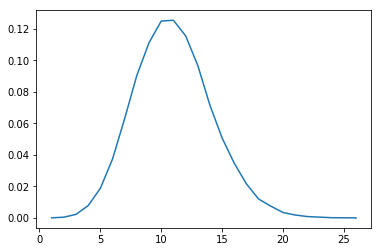

In [6]:
plt.plot(support, vals)

### Plotting the distribution

In [7]:
var = variance(support, vals)
med = median(support, vals)
print(med)
print(var)

11.0
9.9486870016


In [8]:
print(vals)
print(support)
vals[0] = vals[0] + (1 - np.sum(vals))

[7.0000e-05 4.7000e-04 2.2600e-03 7.8500e-03 1.8810e-02 3.7430e-02
 6.3200e-02 9.0580e-02 1.1131e-01 1.2498e-01 1.2551e-01 1.1566e-01
 9.6870e-02 7.1540e-02 5.0760e-02 3.4680e-02 2.1590e-02 1.1980e-02
 7.4900e-03 3.4400e-03 1.8600e-03 8.7000e-04 5.1000e-04 1.5000e-04
 1.0000e-04 2.0000e-05 1.0000e-05]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 26.]


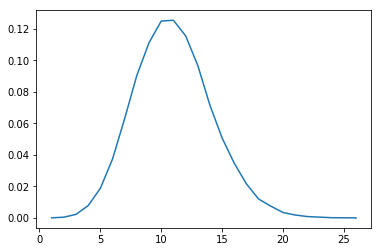

In [9]:
plt.plot(support, vals)

### Test

In [10]:
n = 6
sorted_distribution = support
weights = vals
expected_demand = np.dot(vals, support)
print(expected_demand)
max_budget = n * expected_demand

10.99272


In [11]:
print(max_budget)

65.95632


In [12]:
np.sum(vals)

1.0

In [13]:
group_demands = np.random.choice(size=n, a=sorted_distribution, p=vals)
print(group_demands)

[11.  6.  9.  8. 16. 13.]


In [14]:
print(waterfilling_waste(group_demands, max_budget))

[11.  6.  9.  8. 16. 13.]


In [15]:
print(greedy(group_demands, max_budget))

[11.  6.  9.  8. 16. 13.]


In [16]:
print(constant_threshold(group_demands,max_budget,expected_demand))

[10.99272  6.       9.       8.      10.99272 10.99272]


In [17]:
print(waterfilling_proportional_remaining(group_demands, max_budget))

[10.99272  6.       9.       8.      15.9818  13.     ]


In [18]:
print(waterfilling_et_waste([expected_demand for x in range(n)],group_demands,max_budget))

[10.99272  6.       9.       8.      16.      13.     ]


In [19]:
print(waterfilling_et_full_waste([expected_demand for x in range(n)],group_demands,max_budget))

[10.99272  6.       9.       8.      16.      13.     ]


In [20]:
print(waterfilling_hope_waste_iid(weights, sorted_distribution, group_demands, max_budget))

[11.  6.  9.  8. 16. 13.]


In [21]:
print(weights)
print(sorted_distribution)

[7.0000e-05 4.7000e-04 2.2600e-03 7.8500e-03 1.8810e-02 3.7430e-02
 6.3200e-02 9.0580e-02 1.1131e-01 1.2498e-01 1.2551e-01 1.1566e-01
 9.6870e-02 7.1540e-02 5.0760e-02 3.4680e-02 2.1590e-02 1.1980e-02
 7.4900e-03 3.4400e-03 1.8600e-03 8.7000e-04 5.1000e-04 1.5000e-04
 1.0000e-04 2.0000e-05 1.0000e-05]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 26.]


In [22]:
print(waterfilling_hope_full_waste_iid(weights, sorted_distribution, group_demands, max_budget))

[11.  6.  9.  8. 16. 13.]


In [23]:
print(max_min_heuristic(group_demands, [med for x in range(n)], [expected_demand for x in range(n)], [var for x in range(n)], max_budget))

[10.99272     5.99602909  8.99404364  7.99470545 15.98941091 13.        ]


# Experiments

## Varying Number of Groups

### Look at scaling with n

In [24]:
max_n = 100
num_iterations = 1000
print(weights)
print(sorted_distribution)

[7.0000e-05 4.7000e-04 2.2600e-03 7.8500e-03 1.8810e-02 3.7430e-02
 6.3200e-02 9.0580e-02 1.1131e-01 1.2498e-01 1.2551e-01 1.1566e-01
 9.6870e-02 7.1540e-02 5.0760e-02 3.4680e-02 2.1590e-02 1.1980e-02
 7.4900e-03 3.4400e-03 1.8600e-03 8.7000e-04 5.1000e-04 1.5000e-04
 1.0000e-04 2.0000e-05 1.0000e-05]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 26.]


In [25]:
expected_waterfilling_threshold = np.zeros(max_n+1)
num_iterations = 1000
for i in np.arange(2,max_n+1):
    for _ in range(num_iterations):
        budget = i * 15.
        demands = np.random.choice(size=i, a=support, p=vals)
        opt = waterfilling_waste(demands, budget)
        expected_waterfilling_threshold[i] += (1/num_iterations)*max(opt)
print(expected_waterfilling_threshold)

[ 0.          0.         12.628      13.7985     14.27216667 14.587
 15.097      15.496      15.757      15.842      16.135      16.341
 16.341      16.541      16.667      16.782      16.917      16.983
 17.2        17.239      17.313      17.326      17.518      17.512
 17.616      17.75       17.723      17.727      17.982      17.9
 17.89       17.949      18.093      18.076      18.244      18.195
 18.154      18.276      18.437      18.288      18.319      18.444
 18.527      18.507      18.582      18.621      18.622      18.649
 18.632      18.704      18.674      18.757      18.781      18.811
 18.879      18.885      18.892      18.955      18.868      19.013
 18.989      19.031      18.982      19.154      19.162      19.093
 19.194      19.225      19.195      19.23       19.258      19.345
 19.31       19.283      19.394      19.337      19.425      19.363
 19.429      19.439      19.379      19.488      19.483      19.451
 19.456      19.524      19.576      19.479      1

In [26]:
data_dict = {'NumGroups':[], 'Norm':[], 'ET_Online':[],'Hope_Online':[], 'Adapt_Threshold':[], 'Threshold':[], 'Expected_Filling':[], 'Greedy':[], 'ET_Full':[], 'Hope_Full':[], 'Max_Min':[]}
num_iterations = 100
for n in np.arange(2,max_n+1,1):
    n = max(int(n),1)
    group_expected_demands = np.zeros(n) + np.dot(weights, sorted_distribution)
    group_median_demands = np.zeros(n) + med
    group_variance = np.zeros(n) + var
    budget = n*expected_demand
    print(n)
    for i in range(num_iterations):
        data_dict['NumGroups'].append(n)

        
        group_demands = np.random.choice(size=n, a=support, p=vals)
        opt = waterfilling_waste(group_demands,budget)
        
        hope_sol = waterfilling_hope_waste_iid(weights, sorted_distribution, group_demands, budget)
        hope_full_sol = waterfilling_hope_full_waste_iid(weights, sorted_distribution, group_demands, budget)
        dynamic = waterfilling_et_waste(group_expected_demands,group_demands,budget)
        et_full = waterfilling_et_full_waste(group_expected_demands, group_demands, budget)
        proportional_threshold = waterfilling_proportional_remaining(group_demands, budget)
        greed_sol = greedy(group_demands,budget)
        threshold = constant_threshold(group_demands,budget,expected_demand)
        expect_threshold = constant_threshold(group_demands, budget, expected_waterfilling_threshold[n])
        max_min_heuristic_sol = max_min_heuristic(group_demands, group_median_demands, group_expected_demands, group_variance, budget)
        
        
        
        data_dict['Norm'].append('L1')
        data_dict['Hope_Online'].append(np.sum(np.absolute(opt - hope_sol)))
        data_dict['ET_Online'].append(np.sum(np.absolute(opt-dynamic)))
        data_dict['Adapt_Threshold'].append(np.sum(np.absolute(opt - proportional_threshold)))
        data_dict['Greedy'].append(np.sum(np.absolute(opt-greed_sol)))
        data_dict['Threshold'].append(np.sum(np.absolute(opt-threshold)))
        data_dict['ET_Full'].append(np.sum(np.absolute(opt-et_full)))
        data_dict['Hope_Full'].append(np.sum(np.absolute(opt-hope_full_sol)))
        data_dict['Expected_Filling'].append(np.sum(np.absolute(opt - expect_threshold)))
        data_dict['Max_Min'].append(np.sum(np.absolute(opt-max_min_heuristic_sol)))
        
        data_dict['NumGroups'].append(n)
        data_dict['Norm'].append('Linf')
        data_dict['Hope_Online'].append(np.max(np.absolute(opt - hope_sol)))
        data_dict['ET_Online'].append(np.max(np.absolute(opt-dynamic)))
        data_dict['Adapt_Threshold'].append(np.max(np.absolute(opt - proportional_threshold)))
        data_dict['Greedy'].append(np.max(np.absolute(opt-greed_sol)))
        data_dict['Threshold'].append(np.max(np.absolute(opt-threshold)))
        data_dict['ET_Full'].append(np.max(np.absolute(opt-et_full)))
        data_dict['Hope_Full'].append(np.max(np.absolute(opt-hope_full_sol)))
        data_dict['Expected_Filling'].append(np.max(np.absolute(opt - expect_threshold)))
        data_dict['Max_Min'].append(np.max(np.absolute(opt-max_min_heuristic_sol)))

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


In [27]:
df = pd.DataFrame(data_dict).melt(id_vars=["NumGroups", 'Norm'])

In [28]:
df.to_csv('scale_with_n.csv')

In [29]:
df.columns

Index(['NumGroups', 'Norm', 'variable', 'value'], dtype='object')

In [30]:
df.head

<bound method NDFrame.head of         NumGroups  Norm   variable       value
0               2    L1  ET_Online    0.000000
1               2  Linf  ET_Online    0.000000
2               2    L1  ET_Online    0.000000
3               2  Linf  ET_Online    0.000000
4               2    L1  ET_Online    0.007280
5               2  Linf  ET_Online    0.007280
6               2    L1  ET_Online    0.000000
7               2  Linf  ET_Online    0.000000
8               2    L1  ET_Online    0.000000
9               2  Linf  ET_Online    0.000000
10              2    L1  ET_Online    0.007280
11              2  Linf  ET_Online    0.007280
12              2    L1  ET_Online    0.000000
13              2  Linf  ET_Online    0.000000
14              2    L1  ET_Online    0.000000
15              2  Linf  ET_Online    0.000000
16              2    L1  ET_Online    0.000000
17              2  Linf  ET_Online    0.000000
18              2    L1  ET_Online    1.007280
19              2  Linf  ET_On

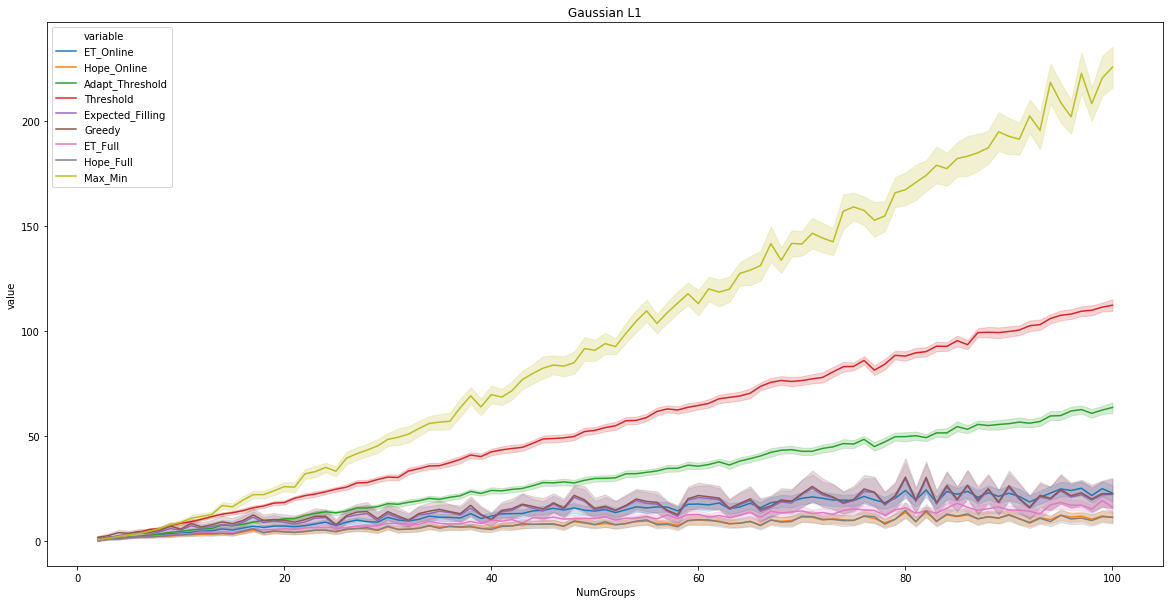

In [31]:
filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
plt.figure(figsize=(20,10))
plt.title('Gaussian L1')
sns.lineplot(x='NumGroups', y='value', hue='variable', data=df[df.Norm == 'L1'])

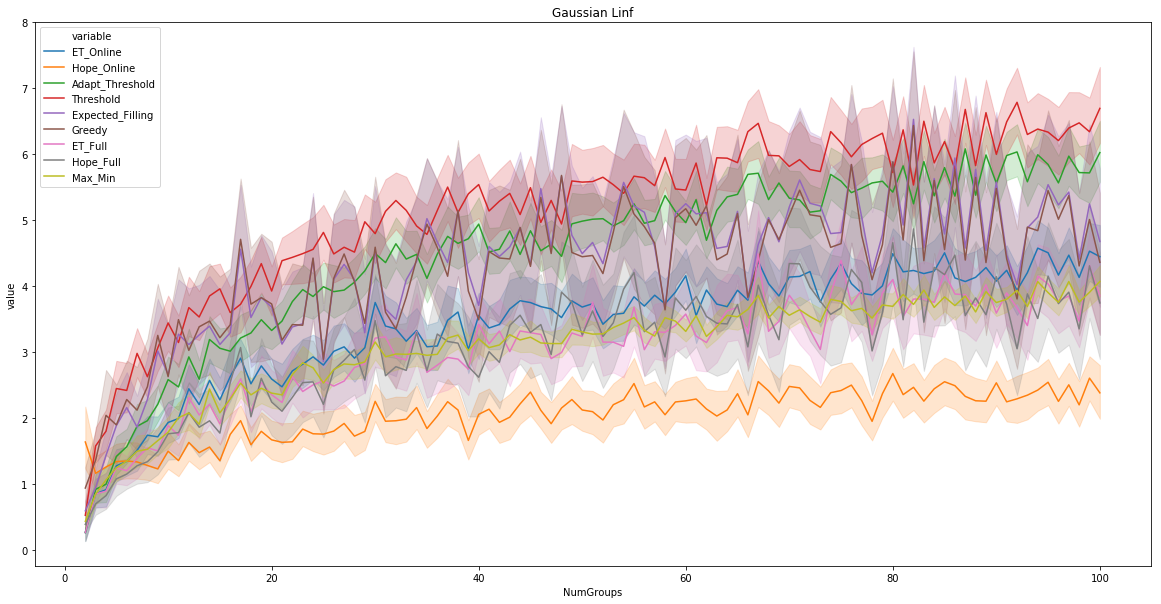

In [32]:
filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
plt.figure(figsize=(20,10))
plt.title('Gaussian Linf')
sns.lineplot(x='NumGroups', y='value', hue='variable', data=df[df.Norm == 'Linf'])

In [33]:
sorted_support = sorted_distribution

In [34]:
data_dict = {'Group':[], 'Hope_Full':[], 'Hope_Online':[],'ET_Full':[], 'ET_Online':[], 'True':[], 'Max_Min':[]}
data_dict_budget = {'Group':[], 'Hope_Full':[], 'Hope_Online':[],'ET_Full':[], 'ET_Online':[], 'True':[], 'Max_Min':[], 'ET_Full_Hindsight':[], 'Hope_Full_Hindsight':[]}
num_iterations = 100



for i in range(num_iterations):
    max_n = 100
    
    expected_demands = [expected_demand for x in range(max_n)]
    median_demands = [med for _ in range(max_n)]
    variance = [var for _ in range(max_n)]
    
    # print(weights)
    # print(sorted_support)
    # print(expected_demands)
    max_budget = max_n*expected_demand
    
    
    
    group_demands = np.random.choice(size=max_n, a=sorted_support, p=weights).astype(np.float)
    print('Demands for experiment:' + str(group_demands))   
    
    
    et_full = np.copy(expected_demands)
    et_online = np.sort(np.copy(expected_demands))
    
    et_online_budget = max_budget
    hope_online_budget = max_budget

    hope_online_support = np.copy(sorted_support)
    hope_online_vals = np.copy(weights)*max_n
    hope_full_vals_history = np.copy(weights)*0
    
    
    hope_full_support = np.copy(sorted_support)
    hope_full_vals = np.copy(weights)*max_n


    max_min_budget = max_budget
    min_fill = 1.
    
    true_budget = max_budget
    et_full_budget = max_budget
    hope_full_budget = max_budget
    


    
    for n in range(max_n):
        # Solve for the various waterfilling levels and budgets
        
        data_dict['Group'].append(n)
        data_dict_budget['Group'].append(n)
        
        # OFFLINE
        
        # Computes Offline Optimal in hindsight
        off_opt = waterfilling(np.copy(group_demands), max_budget)
        
        # Calculates the budget remaining to this point
        true_budget -= off_opt[n] 
        
        # Appends the waterfilling level
        data_dict['True'].append(min(max(off_opt), max_budget))
        data_dict_budget['True'].append(true_budget)
        
        
        # ET FULL
        
        # Replaces current town's demand with realized demand
        et_full[n] = group_demands[n]
    
        # Sorts demands
        et_full_sorted = np.sort(np.copy(et_full))
        # and gets their original indexes
        orig_index = np.argsort(np.copy(et_full))
        
        # Determines the location of the current location's demand in sorted matrix
        index = np.argmin(np.abs(et_full_sorted - group_demands[n]))
        
        # Appends maximum allocation based on full demand with full budget
        et_full_sol = waterfilling_sorted(et_full_sorted, max_budget)
        et_full_budget -= min(et_full_sol[index], group_demands[n], et_full_budget)
        
        data_dict['ET_Full'].append(min(max(et_full_sol), et_full_budget))
        data_dict_budget['ET_Full'].append(et_full_budget)
        data_dict_budget['ET_Full_Hindsight'].append(max_budget - np.sum(et_full_sol[orig_index[0:n]]))
            
        # ET ONLINE
        
        # Removes expected demand for current agent from list
        et_online = delete_sorted(et_online, expected_demands[n])
        
        # adds in the demand for current location
        new_sorted_list, index = insert_sorted(et_online, group_demands[n])
        tmp_sol = waterfilling_sorted(new_sorted_list, et_online_budget)
        data_dict['ET_Online'].append(max(tmp_sol))
        # subtracts off the allocation for the next round
        et_online_budget -= min(tmp_sol[index], et_online_budget, group_demands[n])
        data_dict_budget['ET_Online'].append(et_online_budget)
        
        # HOPE FULL
        
        # Updating the weights for the observed group
        obs_demand = group_demands[n]
        
        # Gets location of current demand
        index = np.argmin(np.abs(hope_full_support - obs_demand))
        
        # Update Weights
        hope_full_vals -= weights
        hope_full_vals[index] += 1
        
        # Calculates solution
        hope_full_sol = waterfilling_sorted_weights(hope_full_support, hope_full_vals, max_budget)
        
        # Updates budget
        hope_full_budget -= min(hope_full_sol[index], group_demands[n], hope_full_budget)
        data_dict['Hope_Full'].append(max(waterfilling_sorted_weights(hope_full_support, hope_full_vals, max_budget)))
        data_dict_budget['Hope_Full'].append(hope_full_budget)
        
        # Uses full historical data to get hindsight budget
        hope_full_vals_history[index] += 1        
        data_dict_budget['Hope_Full_Hindsight'].append(max_budget - np.dot(hope_full_sol, hope_full_vals_history))
        
        
        
        # HOPE ONLINE
        obs_demand = group_demands[n]
        
        # Updates weights
        index = np.argmin(np.abs(hope_online_support - obs_demand))
        hope_online_vals -= weights
        hope_online_vals[index] += 1        

        
        
        tmp_sol = waterfilling_sorted_weights(hope_online_support, hope_online_vals, hope_online_budget)
        hope_online_budget -= min(obs_demand, hope_online_budget, tmp_sol[index])
        
        hope_online_vals[index] -= 1
        data_dict['Hope_Online'].append(max(tmp_sol))
        data_dict_budget['Hope_Online'].append(hope_online_budget)
        
        
        # Max_Min
        
        if n == max_n - 1:
            data_dict['Max_Min'].append(min(max_min_budget, group_demands[n]))
            data_dict_budget['Max_Min'].append(max_min_budget - min(max_min_budget, group_demands[n]))
        else:
            delta = (median_demands[n] - median_demands[n+1]) / ((1/2)* (median_demands[n] + median_demands[n+1]))
            budget_portion = max_min_budget * (expected_demands[n] + expected_demands[n+1]) / np.sum(expected_demands[n:])
            heuristic_threshold = budget_portion * (group_demands[n] / (group_demands[n] + median_demands[n+1] + delta * np.sqrt(variance[n+1])))
            allocation = min(heuristic_threshold, min_fill*group_demands[n], max_min_budget)
            data_dict['Max_Min'].append(heuristic_threshold)
            
            if allocation / group_demands[n] <= min_fill:
                min_fill = allocation / group_demands[n]
            max_min_budget -= allocation
            data_dict_budget['Max_Min'].append(max_min_budget)
            

Demands for experiment:[ 7. 11. 12.  7. 10.  7.  9. 13. 14.  8.  7.  9. 12.  9. 11.  9. 11.  7.
 10. 10. 11. 10. 17. 11.  7. 16. 11. 14.  9. 10. 15. 13.  8. 10.  7. 10.
 11. 13.  4.  6. 11.  9.  9. 12. 15. 13.  8. 11.  5. 10. 15. 14. 13.  7.
 15. 11.  9. 10. 14. 10. 13.  4. 14. 10. 18. 12.  9.  6. 12. 10. 20. 12.
  7.  7. 12.  7.  9. 13. 15.  9. 17. 13. 21.  7. 16. 12.  8. 10. 14. 17.
 15. 12. 14. 12. 12.  8. 10.  2.  8.  7.]
Demands for experiment:[ 9.  8. 13. 11.  8. 16. 11. 12.  9. 11.  7. 15. 14. 14.  8. 16. 12.  8.
 11. 18. 13.  4. 15.  7.  6. 11. 10. 12. 13. 15. 11. 12. 10.  9. 10.  8.
 12.  9. 10.  8. 11.  8. 11.  8. 13.  7.  7. 15. 13. 11. 16.  9.  6. 14.
 13. 19. 10. 13. 16. 11. 10.  8.  8. 14. 12.  6. 11. 11.  9.  9. 11. 17.
 15.  9. 13.  8.  9.  8.  8. 14. 17.  9.  6. 17. 16.  6. 14.  6. 10. 12.
 16. 13. 14.  7. 17. 16. 11.  9.  9. 12.]
Demands for experiment:[10. 10.  5. 12. 14. 18. 11. 12.  7. 13. 12.  5. 12. 17. 11.  5. 10. 14.
 10. 17. 10. 11. 16.  7. 11. 11. 12. 11. 14.

Demands for experiment:[11. 12.  5. 16.  8.  8. 13. 17.  9. 10. 10.  9. 10. 11.  9. 10. 10.  6.
 11. 10.  8. 15.  9. 10. 10. 11. 10. 13. 11. 14. 11.  9. 10.  8. 11. 14.
 10.  7.  3. 12.  9.  8.  9. 11.  6. 12. 15. 13.  8. 12. 14. 10. 15. 15.
  8. 12. 13. 14.  8. 14. 11.  8. 12. 13. 11.  5. 11. 13. 12. 14.  7.  8.
 16.  9.  4. 11.  9. 11. 11. 10.  9. 12.  9. 11. 12. 10. 12. 12. 13.  9.
 12. 10. 12. 13.  9. 14. 14.  9. 11. 16.]
Demands for experiment:[ 7. 10.  9. 15. 13. 14.  8.  7.  7. 13.  4.  9. 11. 10. 15.  9. 13. 13.
 16. 13. 13.  7. 12. 14. 15. 10.  8.  9.  7. 13. 13.  7. 11.  8.  9. 10.
 12. 14.  7.  9.  9. 11. 15. 13. 15. 12. 13. 15. 12. 14. 11.  5. 13.  9.
 15.  8. 14. 11. 13.  5.  9. 18. 12. 15. 12.  8. 10. 13. 12. 10. 12. 11.
 12. 12. 10.  8.  8.  9. 11. 15. 11.  9. 11. 10.  5.  9.  6. 11.  9.  9.
 13. 10.  7. 10.  9. 18.  8. 13. 13. 11.]
Demands for experiment:[ 9. 11. 12.  9. 11. 13. 12. 14. 12.  9. 11.  7. 10. 12. 11. 17. 17. 12.
  9. 10. 10. 14. 10. 12.  9.  9.  8. 10. 10.

Demands for experiment:[12.  5. 13. 10.  9. 13. 16. 19. 10.  6. 15.  9. 11.  9. 13. 13.  5.  8.
 11.  7.  6. 14. 12. 16.  7. 13. 10.  6. 12. 10.  8. 14. 15. 12. 14.  9.
 14. 16. 15. 15.  4. 10. 10.  9. 10. 11. 11. 10. 12. 15.  5.  9. 11. 11.
 11.  9. 10.  9. 17. 12. 15.  6. 15.  7.  9. 10. 10. 14. 10. 12. 12. 16.
 11.  9. 18.  9. 15.  9. 13. 10.  6. 12. 10. 14.  7.  7.  8. 12. 10. 12.
 11. 12. 12.  9. 11.  9. 14. 12. 12.  9.]
Demands for experiment:[12. 12. 12. 14.  9.  8. 12. 13. 12.  8. 12. 10.  8.  4.  6. 11.  9.  5.
 18.  9. 16.  6. 14. 10. 12. 16. 15. 13. 11.  9. 10.  7.  7. 11. 14.  9.
 14. 15. 10.  8. 11.  8. 11.  9.  2. 12. 10. 14. 13. 14.  9. 16. 13. 11.
  8. 13. 11. 15.  6. 12. 11. 14. 12.  7. 10. 14. 10.  9. 15. 19. 12. 13.
  9. 10. 14. 12. 11. 10. 15. 11.  8. 11. 16.  5. 12. 11. 14. 19. 16. 15.
  9. 14.  8. 13. 13. 10.  7. 10. 13.  9.]
Demands for experiment:[10.  8. 12. 10. 10. 11. 10. 10. 12. 10.  9. 10. 12. 18.  8. 12.  6.  4.
  6. 12. 10. 12. 14.  8.  5. 17. 15. 17. 14.

Demands for experiment:[ 9.  8. 17. 14. 15. 10.  8. 11. 11. 11. 14.  6. 10. 13. 10.  9. 13.  5.
 16. 16.  8. 12. 12. 16. 14.  7. 11.  9. 15. 10. 13.  9. 14. 13. 13.  5.
  8. 11. 15. 10. 14. 11. 10.  9.  9.  9. 12. 18. 13. 10. 13. 13.  7.  9.
  9. 10.  7. 12. 12.  9. 10. 10.  7.  8.  7. 11.  7.  7. 10.  9. 13. 13.
 10. 10. 12. 11. 12. 10.  6. 15. 13.  9.  7. 14. 12. 14. 11. 13.  8.  6.
  7.  9. 15.  6. 12. 12. 19. 14. 13. 11.]
Demands for experiment:[11.  9. 10. 10.  9. 14. 12. 11.  6.  7.  6.  9. 15. 16.  7. 12. 16. 15.
  9. 13.  8. 10. 14. 13. 12. 10. 11.  9. 11. 16. 13. 14. 10. 13. 11.  5.
 13.  8. 11. 10.  8. 11. 11. 13. 15. 11.  9. 10.  8.  9. 14. 10. 15. 16.
  9.  6. 11.  8.  9. 10. 14. 10.  7. 16.  8. 15. 15. 11. 10. 13. 12. 14.
  6. 13. 10. 14. 16. 15. 12. 13. 10.  8.  5. 11. 15. 12. 13.  8.  5. 11.
  8. 14. 10.  4. 12.  7. 14.  6. 14.  7.]
Demands for experiment:[12. 14. 11. 17.  6. 16.  9.  7. 11. 14.  9.  5. 14. 15.  8. 19.  8. 14.
  9. 11.  9. 11. 12. 11.  7. 12. 12.  8.  7.

Demands for experiment:[11. 13. 12. 13. 13. 12.  9.  5.  7.  9.  6.  9.  7. 11. 10. 11. 11. 11.
 14. 14.  6. 11. 12. 10. 11. 10.  9.  8. 10. 11. 10. 11.  9.  6.  6.  5.
 12.  9. 12.  9. 10. 12.  6. 14. 14.  8. 14. 10. 13. 11. 14. 13.  9. 10.
 11.  9. 18.  9. 19. 16. 12. 10.  8. 14. 15. 10. 12. 15.  7. 19. 19. 16.
 16.  9. 11. 12. 11. 14.  9. 14. 13. 20. 13.  4. 11. 12. 10.  7. 15. 10.
  4.  8. 11. 12. 14. 14. 12. 14. 13. 10.]
Demands for experiment:[10. 11.  9. 14. 12. 11.  9.  9. 16. 16. 11.  9.  9.  8. 12.  8.  8. 11.
  9. 10. 10. 10. 10. 10. 10.  8. 12.  8. 15. 11.  8. 13. 12. 12. 12. 10.
 12.  8.  7. 14. 14. 12. 10.  9. 13. 10. 10.  9. 14. 13. 12. 18. 11. 14.
 13. 13. 13.  9.  6. 15. 12. 12. 12.  9. 18.  9. 12.  9.  6. 10.  6. 12.
 14. 12. 13. 14. 12.  9.  6. 12.  9. 13. 12.  8.  9. 17. 14. 13. 10. 10.
 10.  8.  8. 10. 14. 13. 12.  4.  5. 18.]
Demands for experiment:[ 9. 10. 15. 11. 13.  4.  8. 13. 10.  8. 15. 23. 14. 14.  6. 11. 14. 11.
 10. 10.  7. 17. 13. 10.  9. 11. 12.  8.  9.

### Waterfilling Comparison

In [35]:
df = pd.DataFrame(data_dict).melt(id_vars="Group")

In [36]:
df.to_csv('comparison_of_waterfilling_levels.csv')

Text(0.5,0,'Estimated Level')

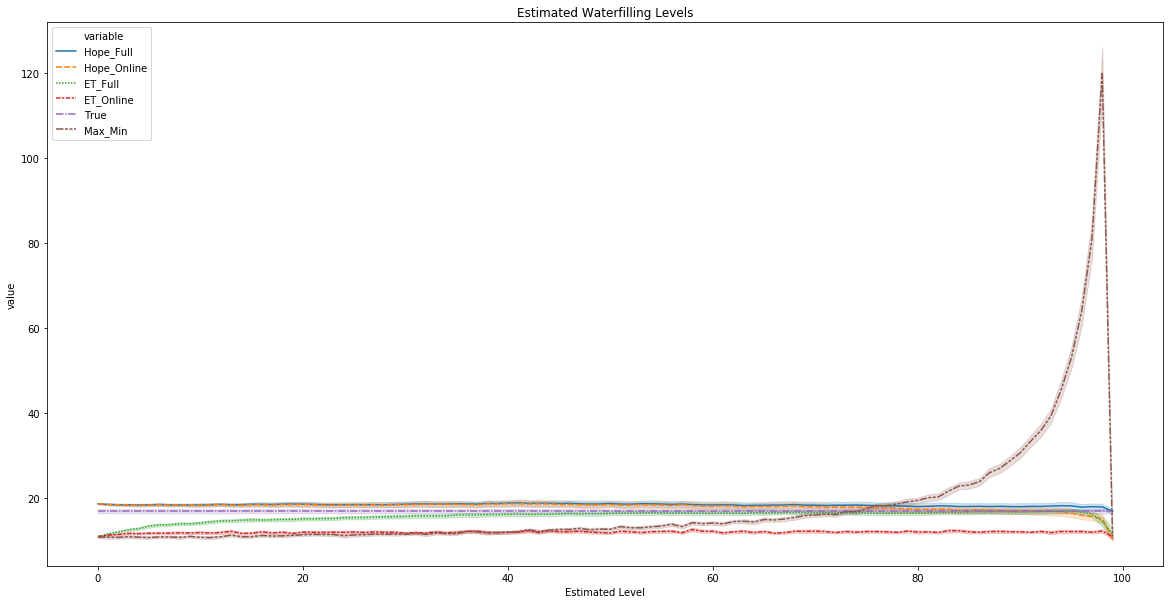

In [37]:
plt.figure(figsize=(20,10))
sns.lineplot(x='Group', y='value', style='variable', hue = 'variable', data=df)
plt.title('Estimated Waterfilling Levels')
plt.xlabel('Estimated Level')

### Budget Comparison

In [38]:
df = pd.DataFrame(data_dict_budget).melt(id_vars="Group")

In [39]:
df.to_csv('comparison_of_budgets.csv')

Text(0.5,0,'Estimated Level')

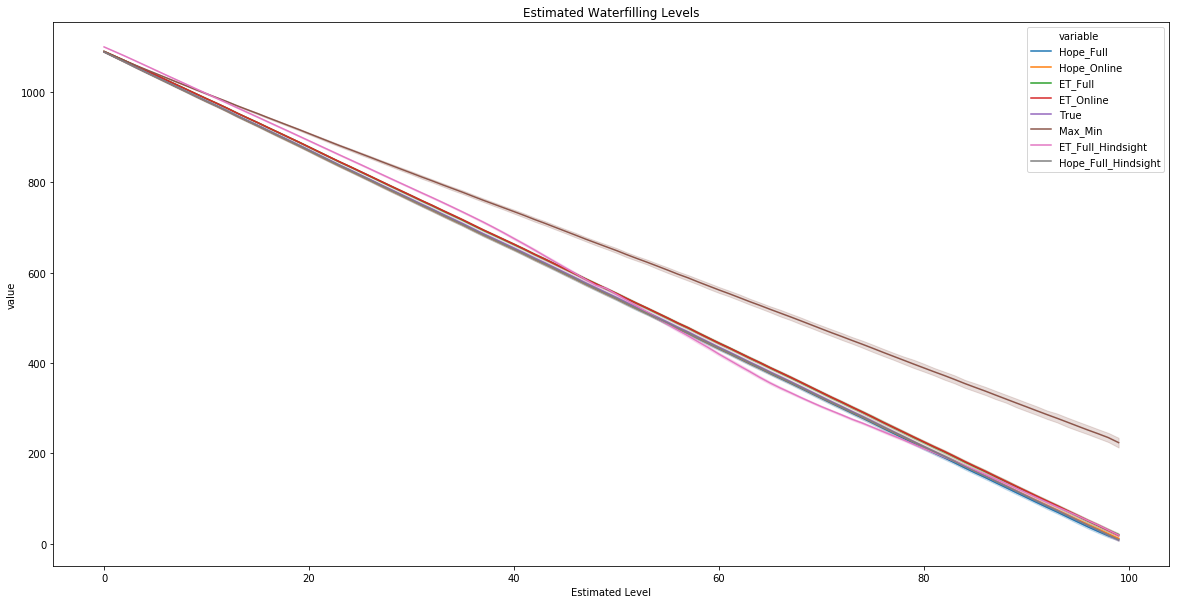

In [40]:
plt.figure(figsize=(20,10))
sns.lineplot(x='Group', y='value', hue = 'variable', data=df)
plt.title('Estimated Waterfilling Levels')
plt.xlabel('Estimated Level')

### Calculating Fairness Statistics


In [41]:
num_iterations = 1000
expected_demand = np.dot(weights, sorted_distribution)
n=100

In [42]:
group = np.arange(n)
group_expected_demands = np.zeros(n) + np.dot(weights, sorted_distribution)
budget = expected_demand*n
score_hope_online = np.zeros((n,num_iterations))
score_hope_full = np.zeros((n,num_iterations))
score_et_online = np.zeros((n,num_iterations))
score_et_full = np.zeros((n,num_iterations))
score_greedy = np.zeros((n,num_iterations))
score_adapt_threshold = np.zeros((n,num_iterations))
score_fixed_threshold = np.zeros((n,num_iterations))
score_expect_threshold = np.zeros((n, num_iterations))
score_max_min = np.zeros((n, num_iterations))

# 8 different algorithms
env = np.zeros((9,num_iterations))
po = np.zeros((9,num_iterations))
prop = np.zeros((9,num_iterations))
linf = np.zeros((9,num_iterations))
max_min = np.zeros((9, num_iterations))
l1 = np.zeros((9, num_iterations))

for i in range(num_iterations):
    budget = n*np.dot(weights, sorted_distribution)

        
    group_demands = np.random.choice(size=n, a=sorted_distribution, p=weights)
    group_median_demands = np.zeros(n) + med
    group_variance = np.zeros(n) + var
    
    
    opt = waterfilling_waste(group_demands,budget)

    hope_sol = waterfilling_hope_waste_iid(weights, sorted_distribution, group_demands, budget)
    hope_full_sol = waterfilling_hope_full_waste_iid(weights, sorted_distribution, group_demands, budget)
    dynamic = waterfilling_et_waste(group_expected_demands,group_demands,budget)
    et_full = waterfilling_et_full_waste(group_expected_demands, group_demands, budget)
    proportional_threshold = waterfilling_proportional_remaining(group_demands, budget)
    greedy_sol = greedy(group_demands,budget)
    threshold = constant_threshold(group_demands,budget,expected_demand)
    expect_threshold = constant_threshold(group_demands, budget, expected_waterfilling_threshold[n])
    max_min_heuristic_sol = max_min_heuristic(group_demands, group_median_demands, group_expected_demands, group_variance, budget)

    # comparing hope_online
    
    score_hope_online[:,i] = opt - hope_sol
    env[0,i] = max(0,np.amax(envy_utility(hope_sol,group_demands)))
    po[0,i] = excess(hope_sol,budget)
    prop[0,i] = np.amax(proportionality_utility(hope_sol,group_demands,budget))
    max_min[0,i] = np.min(utility_ratio(hope_sol, group_demands, budget))
    linf[0,i] = np.amax(np.abs(score_hope_online[:,i]))
    l1[0, i] = np.sum(np.abs(score_hope_online[:,i]))
    
    
    # comparing hope_full
    
    score_hope_full[:,i] = opt - hope_full_sol
    env[1,i] = max(0,np.amax(envy_utility(hope_full_sol,group_demands)))
    po[1,i] = excess(hope_full_sol,budget)
    prop[1,i] = np.amax(proportionality_utility(hope_full_sol,group_demands,budget))
    max_min[1,i] = np.min(utility_ratio(hope_full_sol, group_demands, budget))
    linf[1,i] = np.amax(np.abs(score_hope_full[:,i]))
    l1[1, i] = np.sum(np.abs(score_hope_full[:,i]))    
    
    # comparing et_online
    
    score_et_online[:,i] = opt - dynamic
    env[2,i] = max(0,np.amax(envy_utility(dynamic,group_demands)))
    po[2,i] = excess(dynamic,budget)
    prop[2,i] = np.amax(proportionality_utility(dynamic,group_demands,budget))
    max_min[2,i] = np.min(utility_ratio(dynamic, group_demands, budget))
    linf[2,i] = np.amax(np.abs(score_et_online[:,i]))
    l1[2, i] = np.sum(np.abs(score_et_online[:,i]))      
    
    # comparing et_full
    
    score_et_full[:,i] = opt - et_full
    env[3,i] = max(0,np.amax(envy_utility(et_full,group_demands)))
    po[3,i] = excess(et_full,budget)
    prop[3,i] = np.amax(proportionality_utility(et_full,group_demands,budget))
    max_min[3,i] = np.min(utility_ratio(et_full, group_demands, budget))
    linf[3,i] = np.amax(np.abs(score_et_full[:,i]))
    l1[3, i] = np.sum(np.abs(score_et_full[:,i]))     
    
    # comparing greedy
    
    score_greedy[:,i] = opt - greedy_sol
    env[4,i] = max(0,np.amax(envy_utility(greedy_sol,group_demands)))
    po[4,i] = excess(greedy_sol,budget)
    prop[4,i] = np.amax(proportionality_utility(greedy_sol,group_demands,budget))
    max_min[4,i] = np.min(utility_ratio(greedy_sol, group_demands, budget))
    linf[4,i] = np.amax(np.abs(score_greedy[:,i]))
    l1[4, i] = np.sum(np.abs(score_greedy[:,i]))     
    
    
    # comparing fixed_threshold
    
    score_fixed_threshold[:,i] = opt - threshold
    env[5,i] = max(0,np.amax(envy_utility(threshold,group_demands)))
    po[5,i] = excess(threshold,budget)
    prop[5,i] = np.amax(proportionality_utility(threshold,group_demands,budget))
    max_min[5,i] = np.min(utility_ratio(threshold, group_demands, budget))
    linf[5,i] = np.amax(np.abs(score_fixed_threshold[:,i]))    
    l1[5,i] = np.sum(np.abs(score_fixed_threshold[:,i]))
    
    
    # comparing adaptive_threshold
    
    score_adapt_threshold[:,i] = opt - proportional_threshold
    env[6,i] = max(0,np.amax(envy_utility(proportional_threshold,group_demands)))
    po[6,i] = excess(proportional_threshold,budget)
    prop[6,i] = np.amax(proportionality_utility(proportional_threshold,group_demands,budget))
    max_min[6,i] = np.min(utility_ratio(proportional_threshold, group_demands, budget))
    linf[6,i] = np.amax(np.abs(score_adapt_threshold[:,i]))    
    l1[6,i] = np.sum(np.abs(score_adapt_threshold[:,i]))

    # comparing expected_threshold
    
    score_expect_threshold[:,i] = opt - expect_threshold
    env[7,i] = max(0,np.amax(envy_utility(expect_threshold,group_demands)))
    po[7,i] = excess(expect_threshold,budget)
    prop[7,i] = np.amax(proportionality_utility(expect_threshold,group_demands,budget))
    max_min[7,i] = np.min(utility_ratio(expect_threshold, group_demands, budget))
    linf[7,i] = np.amax(np.abs(score_expect_threshold[:,i]))
    l1[7,i] = np.sum(np.abs(score_expect_threshold[:,i]))

    # comparing max_min_heurstic
    
    score_max_min[:,i] = opt - max_min_heuristic_sol
    env[8,i] = max(0,np.amax(envy_utility(max_min_heuristic_sol,group_demands)))
    po[8,i] = excess(max_min_heuristic_sol,budget)
    prop[8,i] = np.amax(proportionality_utility(max_min_heuristic_sol,group_demands,budget))
    max_min[8,i] = np.min(utility_ratio(max_min_heuristic_sol, group_demands, budget))
    linf[8,i] = np.amax(np.abs(score_max_min[:,i])) 
    l1[8,i] = np.sum(np.abs(score_max_min[:,i]))

In [43]:
score_hope_online = np.average(score_hope_online, axis=1)
score_hope_full = np.average(score_hope_full, axis=1)
score_et_online = np.average(score_et_online, axis=1)
score_et_full = np.average(score_et_full, axis=1)
score_greedy = np.average(score_greedy, axis=1)
score_adapt_threshold = np.average(score_adapt_threshold, axis=1)
score_fixed_threshold = np.average(score_fixed_threshold, axis=1)
score_expect_threshold = np.average(score_expect_threshold, axis=1)
score_max_min = np.average(score_max_min, axis=1)

env_std = np.std(env, axis=1)
po_std = np.std(po, axis=1)
prop_std = np.std(prop, axis=1)
linf_std = np.std(linf, axis=1)
l1_std = np.std(l1, axis=1)
max_min_std = np.std(max_min, axis=1)

env = np.average(env,axis=1)
po = np.average(po,axis=1)
prop = np.average(prop,axis=1)
linf = np.average(linf,axis=1)
max_min = np.average(max_min, axis=1)
l1 = np.average(l1, axis=1)

In [44]:
print(env)

[0.15029043 0.30583055 0.27454315 0.25306191 0.40720648 0.
 0.30212118 0.39901092 0.22687546]


In [45]:
print(po)

[0.16652826 0.15354588 0.23849111 0.25268918 0.13451248 1.25650681
 0.73087923 0.13889624 2.33937896]


In [46]:
print(prop)

[0.01729282 0.24073002 0.         0.07463327 0.38455426 0.
 0.         0.37646266 0.22687546]


In [47]:
print(max_min)

[0.8180902  0.66683913 0.71013976 0.70002425 0.59259327 0.56047187
 0.60503869 0.5829268  0.77312454]


In [48]:
print(linf)

[2.39450551 4.01049997 4.2822605  3.9348125  4.91104523 6.53479614
 5.97935729 5.18024733 3.97391927]


In [49]:
print('hope_online, hope_full, et_online, et_full, greedy, fixed_threshold, adaptive_threshold, expected_threshold, max_min')
print('envy:')
print(env)
print(env_std * 1.96 / np.sqrt(num_iterations))
print('po')
print(po)
print(po_std * 1.96 / np.sqrt(num_iterations))
print('prop')
print(prop)
print(prop_std * 1.96 / np.sqrt(num_iterations))
print('sum')
print(env+po+prop)
print('max_min')
print(max_min)
print(max_min_std * 1.96 / np.sqrt(num_iterations))
print('linf')
print(linf)
print(linf_std * 1.96 / np.sqrt(num_iterations))
print('l1')
print(l1)
print(l1_std * 1.96 / np.sqrt(num_iterations))

hope_online, hope_full, et_online, et_full, greedy, fixed_threshold, adaptive_threshold, expected_threshold, max_min
envy:
[0.15029043 0.30583055 0.27454315 0.25306191 0.40720648 0.
 0.30212118 0.39901092 0.22687546]
[0.00777306 0.02420322 0.00742362 0.01369436 0.02904245 0.
 0.00331578 0.02897297 0.00282269]
po
[0.16652826 0.15354588 0.23849111 0.25268918 0.13451248 1.25650681
 0.73087923 0.13889624 2.33937896]
[0.01124499 0.01157153 0.01198807 0.0124278  0.01152186 0.01124702
 0.01246619 0.01163805 0.03019435]
prop
[0.01729282 0.24073002 0.         0.07463327 0.38455426 0.
 0.         0.37646266 0.22687546]
[0.00252231 0.02385482 0.         0.0142233  0.02823394 0.
 0.         0.0281344  0.00282269]
sum
[0.33411151 0.70010645 0.51303426 0.58038436 0.92627321 1.25650681
 1.03300041 0.91436982 2.79312987]
max_min
[0.8180902  0.66683913 0.71013976 0.70002425 0.59259327 0.56047187
 0.60503869 0.5829268  0.77312454]
[0.00888321 0.02362718 0.00806848 0.01376713 0.02905132 0.00297606
 0.003

In [50]:
data_dict = {'Agent':group, 'Hope_Online': score_hope_online, 'Hope_Full':score_hope_full, 'ET_Online':score_et_online, 'ET_Full':score_et_full, 'Greedy':score_greedy, 'Adapt_Threshold': score_adapt_threshold, 'Fixed_Threshold': score_fixed_threshold, 'Expect_Threshold':score_expect_threshold, 'Max_Min':score_max_min}
df_uniform = pd.DataFrame(data_dict).melt(id_vars="Agent")

In [51]:
df_uniform.columns

Index(['Agent', 'variable', 'value'], dtype='object')

In [52]:
df_uniform.to_csv('fairness_group_by_group.csv')

Text(0.5,0,'Estimated Level')

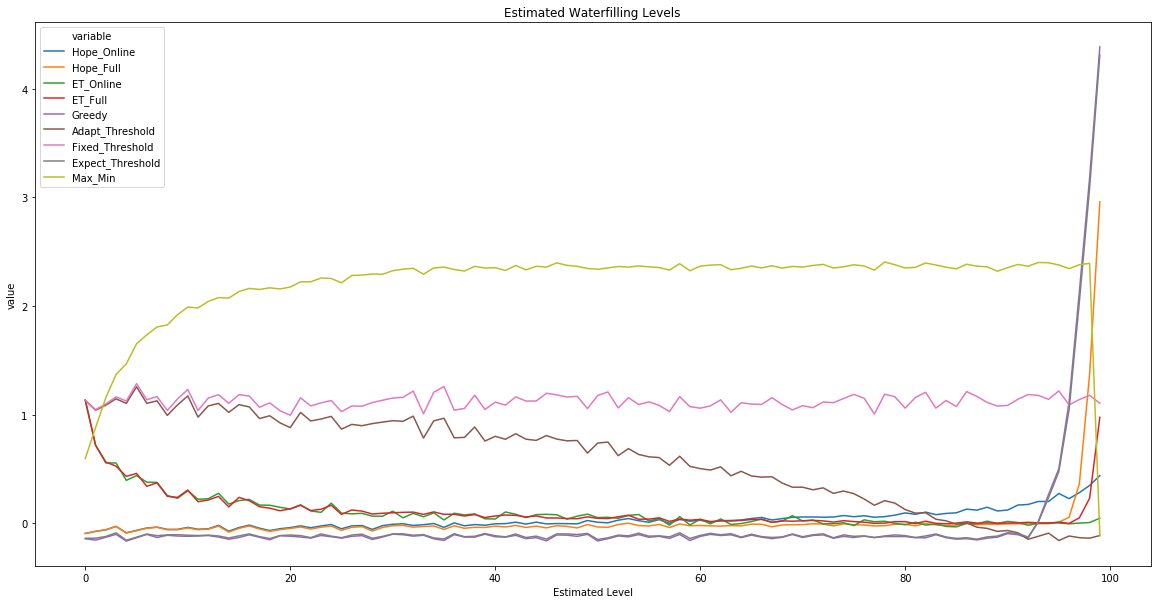

In [53]:
plt.figure(figsize=(20,10))
sns.lineplot(x='Agent', y='value', hue = 'variable', data=df_uniform)
plt.title('Estimated Waterfilling Levels')
plt.xlabel('Estimated Level')